# Pla-Net Model

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.3.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
validation_set = train_datagen.flow_from_directory(
        'dataset/validation_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2723 images belonging to 2 classes.
Found 290 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=2,
        class_mode='binary')

Found 1060 images belonging to 2 classes.


In [49]:
x,y = test_set.next()
x.shape

(2, 64, 64, 3)

## Part 2 - Building the CNN

In [50]:
model = tf.keras.models.Sequential()

In [51]:
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

In [52]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Dropout(0.25))

In [53]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [54]:
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [55]:
model.add(tf.keras.layers.Dropout(0.5))

In [56]:
model.add(tf.keras.layers.Flatten())

In [57]:
model.add(tf.keras.layers.Dense(units = 128, activation='relu'))

In [58]:
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 128)      

## Part 3 - Training the CNN

### Compiling the CNN

In [60]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [61]:
history = model.fit(x = training_set, validation_data = test_set, epochs = 25, batch_size = 2)

Epoch 1/25
86/86 [==============================] - 30s 348ms/step - loss: 0.5314 - accuracy: 0.7029 - val_loss: 0.1701 - val_accuracy: 0.9349
Epoch 2/25
86/86 [==============================] - 29s 341ms/step - loss: 0.2320 - accuracy: 0.9089 - val_loss: 0.1229 - val_accuracy: 0.9575
Epoch 3/25
86/86 [==============================] - 29s 341ms/step - loss: 0.1354 - accuracy: 0.9456 - val_loss: 0.1033 - val_accuracy: 0.9566
Epoch 4/25
86/86 [==============================] - 30s 344ms/step - loss: 0.1830 - accuracy: 0.9361 - val_loss: 0.1014 - val_accuracy: 0.9613
Epoch 5/25
86/86 [==============================] - 30s 347ms/step - loss: 0.1005 - accuracy: 0.9611 - val_loss: 0.0504 - val_accuracy: 0.9811
Epoch 6/25
86/86 [==============================] - 29s 340ms/step - loss: 0.0735 - accuracy: 0.9710 - val_loss: 0.2397 - val_accuracy: 0.9434
Epoch 7/25
86/86 [==============================] - 30s 348ms/step - loss: 0.0689 - accuracy: 0.9802 - val_loss: 0.0320 - val_accuracy: 0.9887

In [62]:
model.save("Planet.h5")

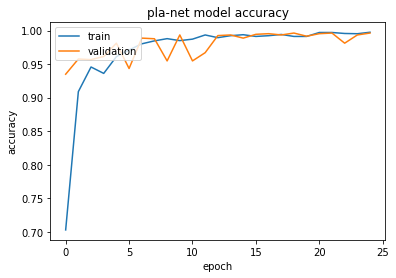

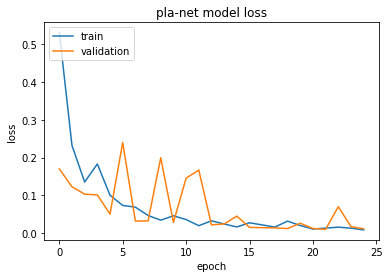

In [69]:
import matplotlib.pyplot as plt
(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('pla-net model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('pla-net model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Part-4 Evaluation Metrics

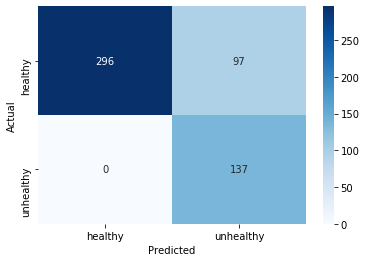

test_accuracy: 81.69811320754718


In [64]:
import pandas as pd
import seaborn as sn
import tensorflow as tf
import numpy as np


model = tf.keras.models.load_model("planet.h5")
filenames = test_set.filenames
nb_samples = len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
    
predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]

out_df =pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, cmap='Blues', annot=True,fmt='d')
plt.show()
print('test_accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [68]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicted_class, actual_class)
print("ACCURACY: "+str(accuracy))
precision = precision_score(predicted_class, actual_class, pos_label = "healthy")
print("PRECISION: "+str(precision))
recall = recall_score(predicted_class, actual_class, pos_label = "healthy")
print("RECALL: "+str(recall))
f1 = f1_score(predicted_class, actual_class, pos_label = "healthy")
print("F1: "+str(f1))
matrix = confusion_matrix(actual_class, predicted_class)
print("CONFUSION MATRIX: ")
print(matrix)

ACCURACY: 0.8169811320754717
PRECISION: 0.7531806615776081
RECALL: 1.0
F1: 0.8592162554426704
CONFUSION MATRIX: 
[[296  97]
 [  0 137]]


## Part 5 - Making a single prediction

In [66]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/check_3.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'unhealthy'
else:
  prediction = 'healthy'

In [67]:
print(prediction)

unhealthy
